# Installing the `network_spatial_coherence` Package

Before running the example, you need to install the `network_spatial_coherence` package. You can do this using pip. Run the following command in a code cell:



In [1]:
!pip install git+https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git



  Cloning https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to /tmp/pip-req-build-yoptfkb7
  Running command git clone --filter=blob:none --quiet https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git /tmp/pip-req-build-yoptfkb7
  Resolved https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to commit 925cdd8bad613664b03d850a178345d79d866589
  Preparing metadata (setup.py) ... done


If that doesn't work you might have to authenticate yourself. This usually involves generating a personal access token (PAT) in GitHub with the necessary permissions to clone the repository. 

In [2]:
!pip install git+https://<token>:x-oauth-basic@github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git


/bin/bash: line 1: token: No such file or directory


## Accessing Documentation

To access the documentation for `network_spatial_coherence`, you can use the `access_docs` function. This can be helpful to understand what the package can and cannot do and also to get definitions on every parameter


In [3]:
from network_spatial_coherence.docs_util import access_docs

# To simply open the documentation:
access_docs()


Attempting to copy documentation from: /home/david/anaconda3/lib/python3.11/site-packages/network_spatial_coherence/docs/build/html
Opening documentation in web browser...


## Running the Example

First, let's create the project structure and explore the default configuration options provided by the package.


In [4]:
from network_spatial_coherence import structure_and_args

structure_and_args.create_project_structure()
structure_and_args.export_default_config('default_config.py')


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'
Default configuration template written to default_config.py


### Customizing Configuration

You can customize the configuration by editing the default config file exported in the previous step, or directly modify the arguments in the code. Here's how you can modify the arguments directly in the code:


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'
proximity_mode lattice
(2025, 2)
num_points 2025
edge_list_title edge_list_N=2025_dim=2_lattice_k=10.csv
Unweighted graph
Edge list columns are valid.
(True, False, 2023, 99.95059288537549, 99.95059288537549)
original graph size
Average Degree sparse: 4.0879012345679016
retrieving edges from edge_list_N=2025_dim=2_lattice_k=10.csv


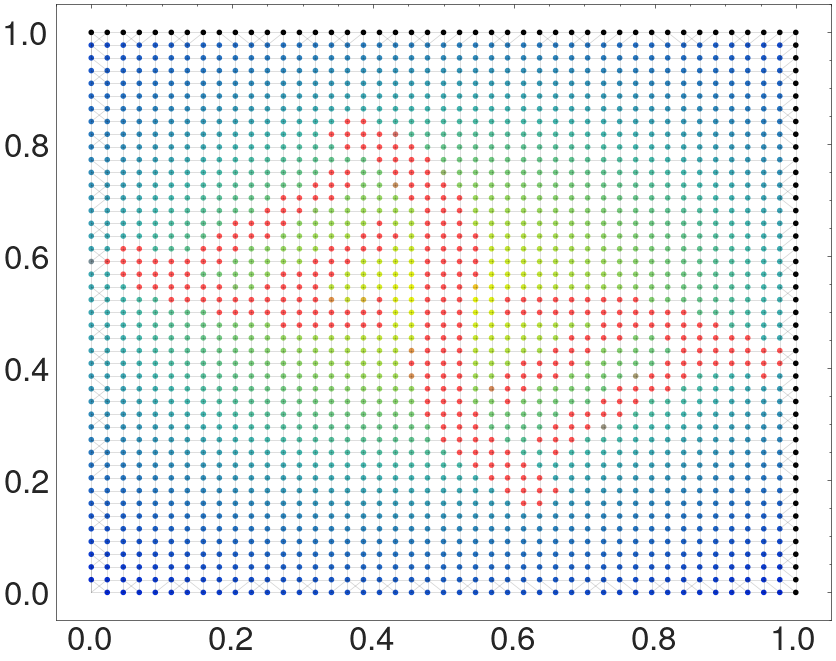

Graph is not an igraph instance. Converting to igraph...
Unweighted graph
Edge list columns are valid.
(True, False, 2023, 99.95059288537549, 99.95059288537549)
average degree igraph 4.0879012345679016
num points 2025


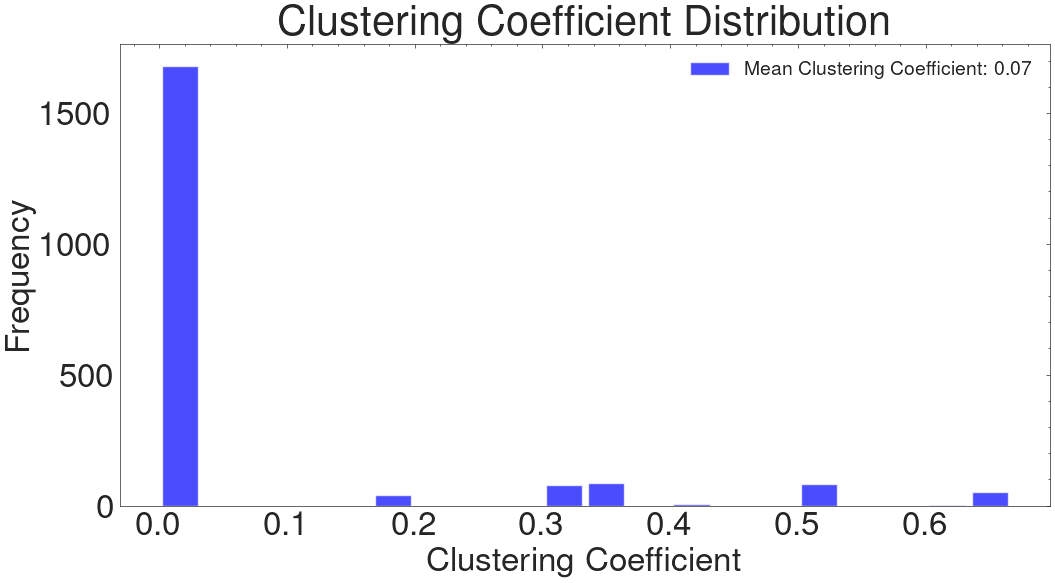

N=2025_dim=2_lattice_k=10


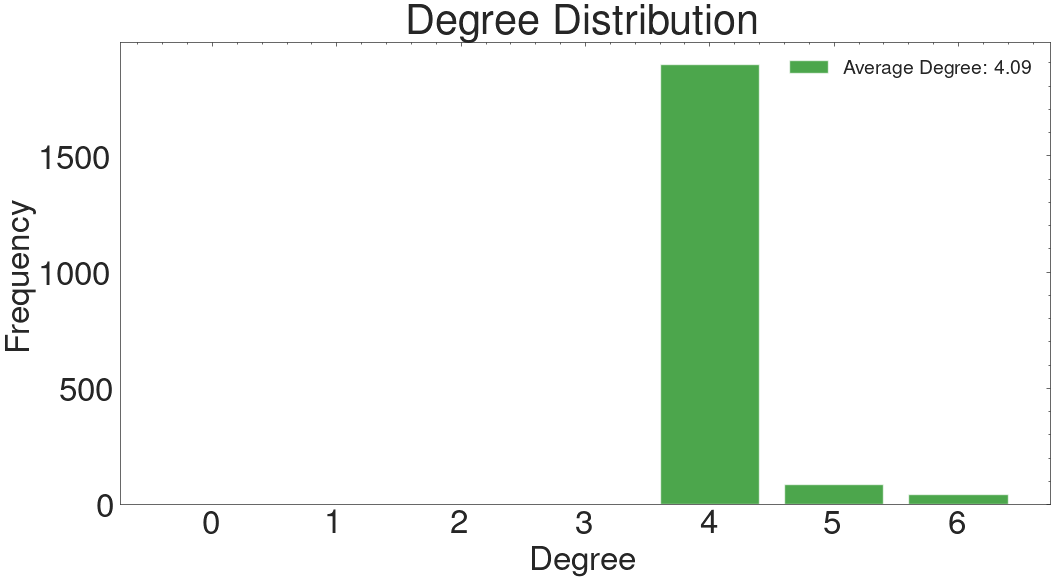

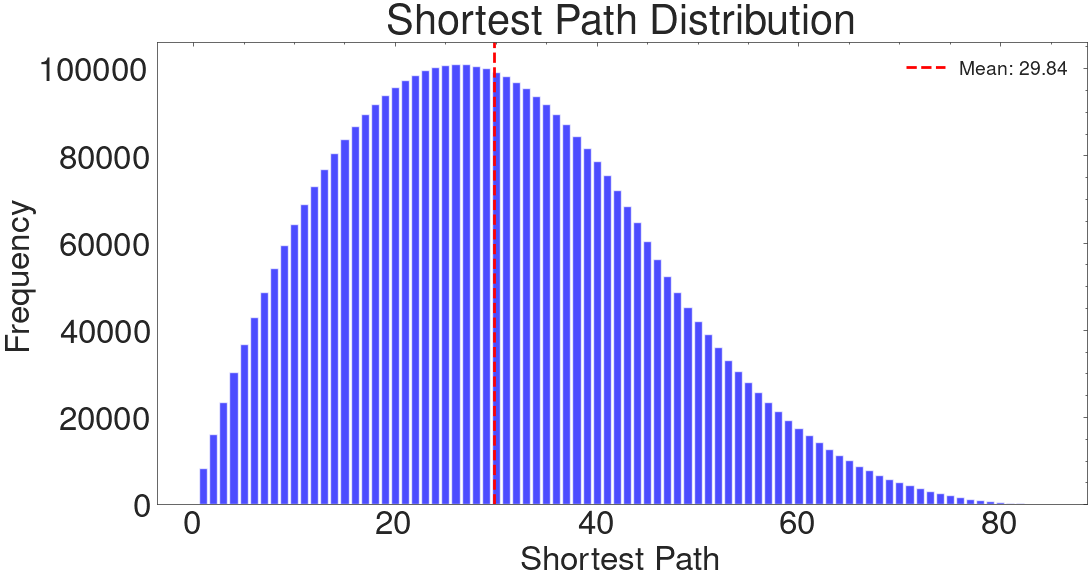

202
Graph is not an igraph instance. Converting to igraph...
size: 50
size: 252
size: 454
size: 656
size: 858
size: 1060
size: 1262
size: 1464
size: 1666
size: 1868
size: 2025
size: 50
size: 252
size: 454
size: 656
size: 858
size: 1060
size: 1262
size: 1464
size: 1666
size: 1868
size: 2025
size: 50
size: 252
size: 454
size: 656
size: 858
size: 1060
size: 1262
size: 1464
size: 1666
size: 1868
size: 2025
size: 50
size: 252
size: 454
size: 656
size: 858
size: 1060
size: 1262
size: 1464
size: 1666
size: 1868
size: 2025
size: 50
size: 252
size: 454
size: 656
size: 858
size: 1060
size: 1262
size: 1464
size: 1666
size: 1868
size: 2025
size: 50
size: 252
size: 454
size: 656
size: 858
size: 1060
size: 1262
size: 1464
size: 1666
size: 1868
size: 2025


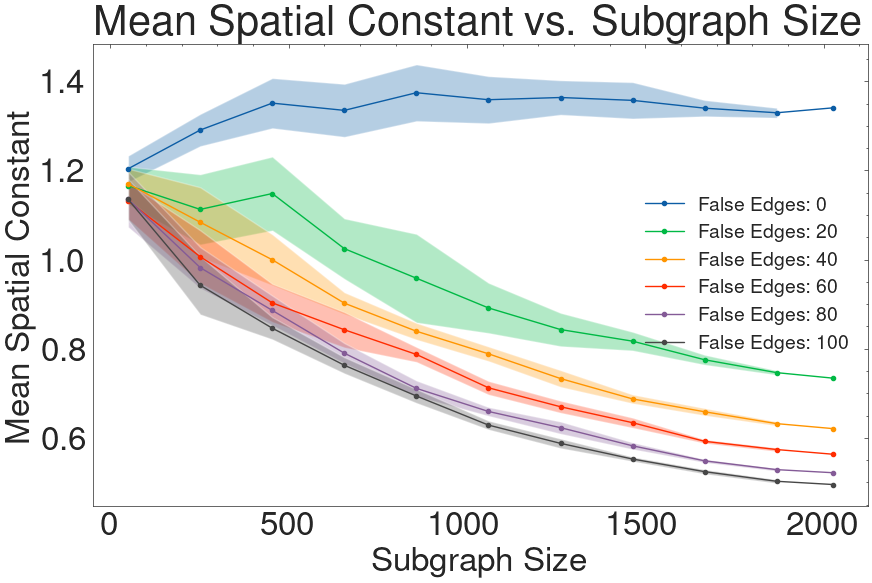

Average Degree 4.0879012345679016


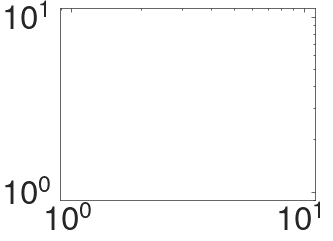

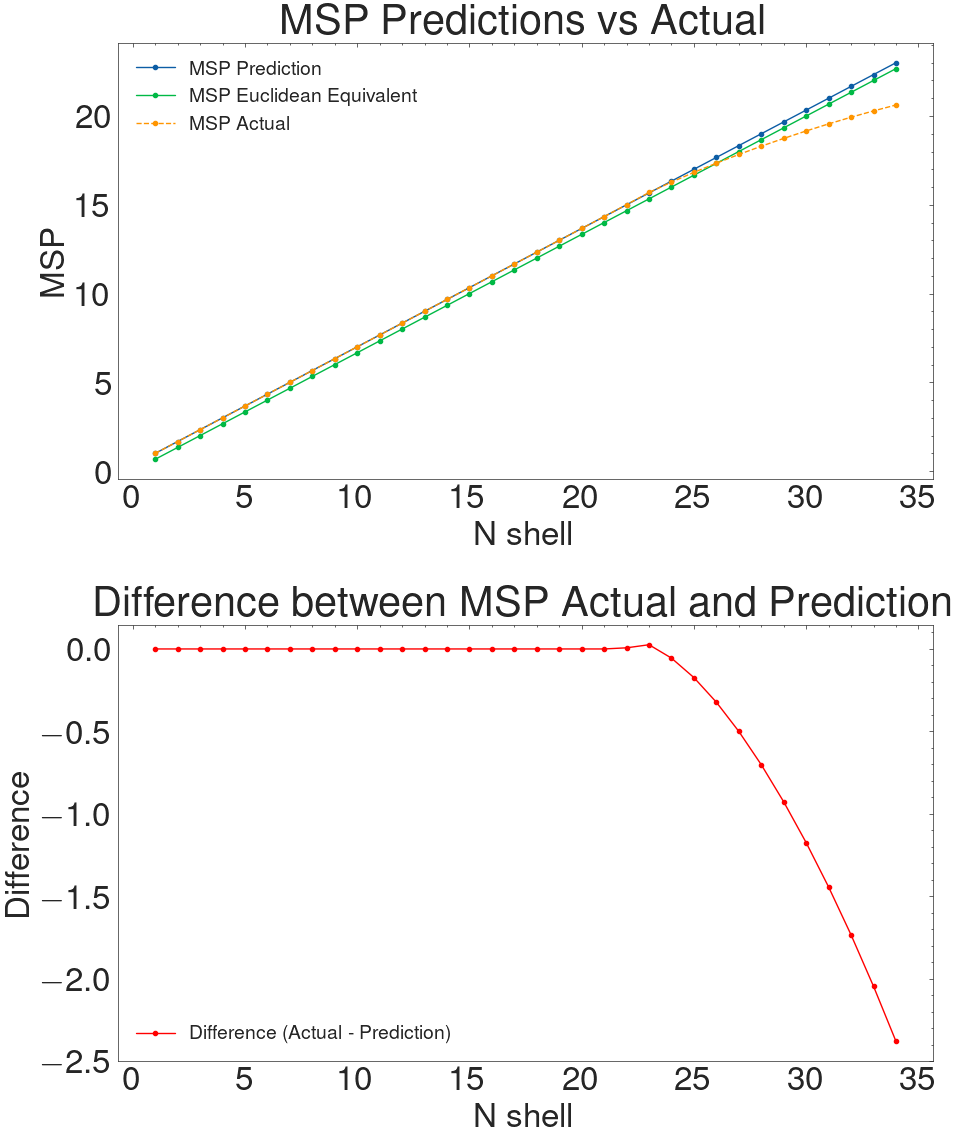

Surface Counts [ 4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 89 95 84
 80 76 72 68 64 60 56 52 48 44 40 36 32 28 24 20 16 16  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Volume Counts [   4   12   24   40   60   84  112  144  180  220  264  312  364  420
  480  544  612  684  760  840  924 1013 1108 1192 1272 1348 1420 1488
 1552 1612 1668 1720 1768 1812 1852 1888 1920 1948 1972 1992 2008 2024
 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024
 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024
 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024]
PREDICTED DIMENSIONS [1.         1.33333333 1.5        1.6        1.66666667 1.71428571
 1.75       1.77777778 1.8        1.81818182 1.83333333 1.84615385
 1.85714286 1.86666667 1.875      1.88235294 1.88888889 1.89473684
 1.9        1.9047619  1.90909091 1.93287266 1.97202166 1.6912751

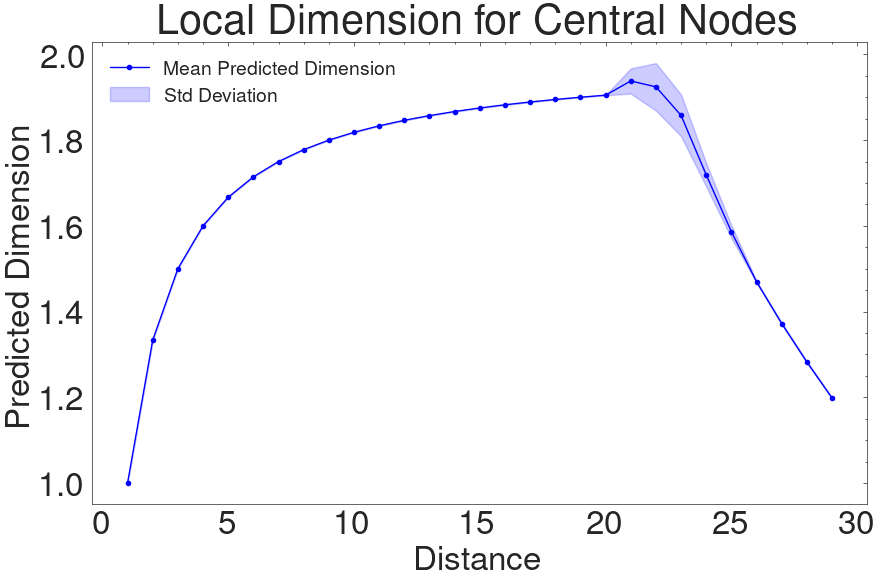

UNCERTAINTY PREDICTED DIMENSION 0.025254743763157287
RESULTS DIMENSION PREDICTION {'predicted_dimension': 1.83381421244636, 'std_predicted_dimension': 0.0035948960868516433}
Results predicted dimension {'predicted_dimension': 1.83381421244636, 'std_predicted_dimension': 0.0035948960868516433}


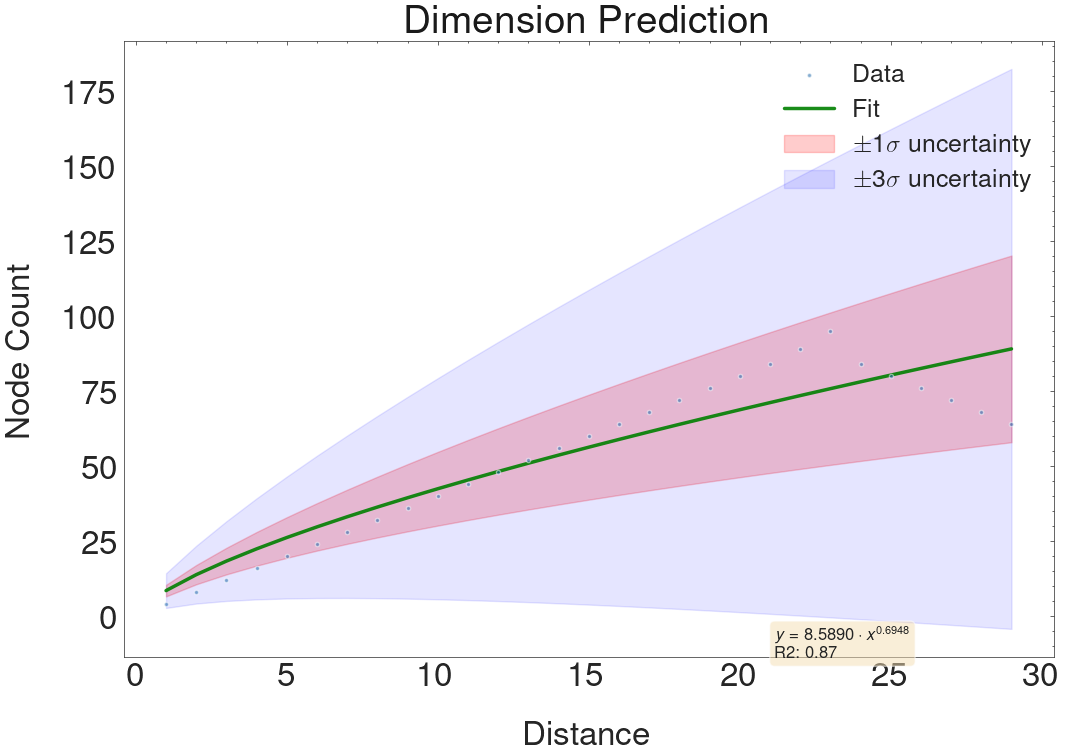

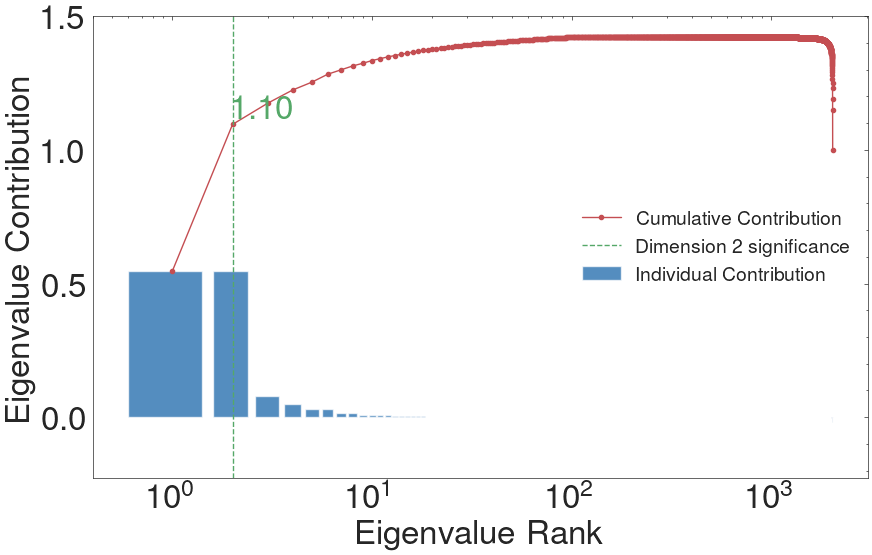

First d values contribution 1.0953360627666693
running reconstruction...
reconstruction mode: node2vec


FileNotFoundError: [Errno 2] No such file or directory: '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/edge_list_N=2025_dim=2_lattice_with_false_edges=100_k=10.csv'

In [14]:
from network_spatial_coherence import nsc_pipeline
import os

# Modify individual parameters
args = structure_and_args.GraphArgs()
args.show_plots = True
args.plot_graph_properties = True
args.colorfile = 'dna_cool2.png'
args.proximity_mode = 'lattice'
args.num_points = 2000
args.spatial_coherence_validation = True

   # TODO: solve how it is updated, solve random plots popping up, solve graph with false edges after running spatial constant

# Load and process the graph
graph, args = nsc_pipeline.load_and_initialize_graph(args=args)


# Run the pipeline and plot the results
single_graph_args = nsc_pipeline.run_pipeline(graph, args)

print("again", args.num_nodes)
nsc_pipeline.plot_profiling_results(single_graph_args)
